In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#reading dataset csv, getting rid of null values

data =pd.read_csv('Enterococcus_faecalis_Infection_Data.csv')
data = data.iloc[1:]
data.dropna(inplace=True)

In [3]:
#make integers

data["OneYear_Death"] = data["OneYear_Death"].astype(int)

In [4]:
#remove other deaths

data = data.drop('SevenDay_Death', axis=1)
data = data.drop('ThirtyDay_Death', axis=1)
data = data.drop('SixWeek_Death', axis=1)
data = data.drop('ThreeMo_Death', axis=1)
data = data.drop('SixMo_Death', axis=1)
data = data.drop('NineMo_Death', axis=1)

In [5]:
#make into averages

data.replace(to_replace ="00-10", value = "5", inplace = True)
data.replace(to_replace ="11-20", value = "15.5", inplace = True)
data.replace(to_replace ="21-30", value = "25.5", inplace = True)
data.replace(to_replace ="31-40", value = "35.5", inplace = True)
data.replace(to_replace ="41-50", value = "45.5", inplace = True)
data.replace(to_replace ="51-60", value = "55.5", inplace = True)
data.replace(to_replace ="61-70", value = "65.5", inplace = True)
data.replace(to_replace ="71-80", value = "75.5", inplace = True)
data.replace(to_replace ="81-90", value = "85.5", inplace = True)
data.replace(to_replace ="80+", value = "80", inplace = True)

del data['Unnamed: 0']

In [6]:
#setting target to be the average follicle number (average of L and R)

y=data['OneYear_Death']
X=data.loc[:,data.columns!="OneYear_Death"]

In [7]:
#split training and testing data

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

#70% of data is being trained, 30% in test

In [8]:
#fit training to discriminant analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

da = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [9]:
#accuracy and f1 values

from sklearn.metrics import confusion_matrix, f1_score

y_pred_train = da.predict(x_train)
y_pred_test = da.predict(x_test)

accuracy = da.score(x_test, y_test)
print("Training accuracy: ", accuracy)

accuracy = da.score(x_test, y_pred_test)
print("Testing accuracy: ", accuracy)

F1_test = f1_score(y_test, y_test)
print("Training F1 score: ", F1_test)

F1_test = f1_score(y_test, y_pred_test)
print("Testing F1 score: ", F1_test)

Training accuracy:  0.6151761517615176
Testing accuracy:  1.0
Training F1 score:  1.0
Testing F1 score:  0.1839080459770115


Confusion matrx:
[[211  55]
 [ 87  16]]


Text(0.5, 427.9555555555555, 'Predicted Death(1Y)')

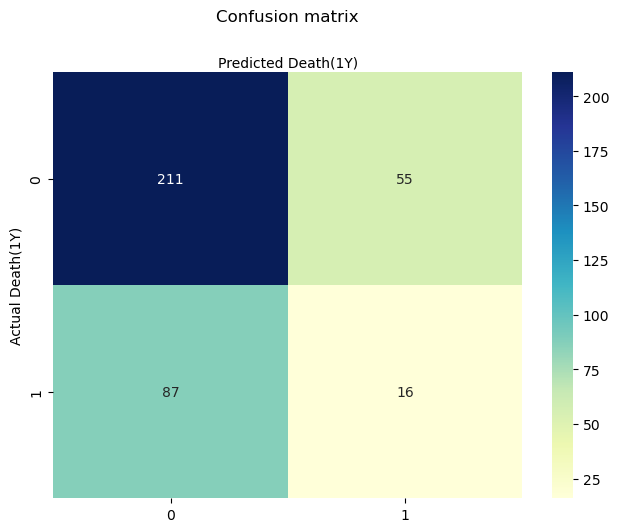

In [10]:
#plot confusion and roc curve

from sklearn import metrics
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

print('Confusion matrx:')
matrix = metrics.confusion_matrix(y_test, y_pred_test)
print(matrix)
# Visualize 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Death(1Y)')
plt.xlabel('Predicted Death(1Y)')

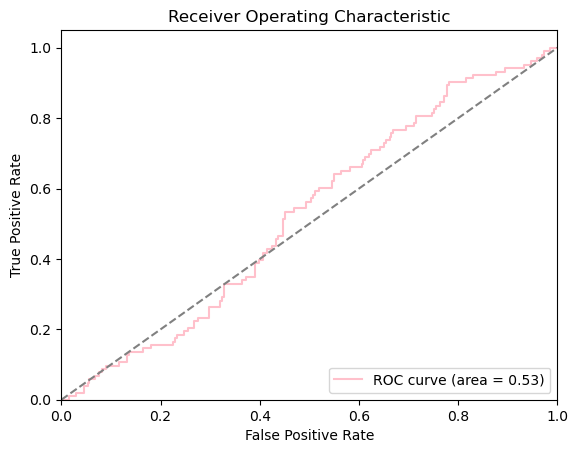

In [11]:
# ROC Curve (binary classification)
y_pred_proba = da.predict_proba(x_test)[:,1]

# Calculate the FPR and TPR at various probability cutoffs
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, color='pink', label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()